# **House Price Prediction using Linear Regression**

In [1]:
# importing necessary modules
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

Seaborn - a data visualisation library which builds works matplotlib to offer a wider variety of visualisations.

In [2]:
# load & read csv file
kc_houses = pd.read_csv('/data/notebook_files/kc_house_data.csv')

In [3]:
# display csv file top rows
kc_houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# note form summary of dataset
print(kc_houses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

*Observation* there are up to 21613 houses in the dataset.

Create your personalized dataset. Replace the value for random_state to the last three
digits of your index number

In [5]:
from pandas.core.common import random_state

data = kc_houses.sample(n = 2100, random_state = 911)

- **Q1**. Display the first five rows of the dataset.
  
- **Q2**. Get a summary of the dataset
  
- **Q3**. Check whether there are any empty rows in the dataset

In [6]:
# print first 5 rows of each column
print(kc_houses.head(5))

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [7]:
# display first 5 rows of dataset
# kc_houses.head(5)

In [8]:
# summary of dataset
kc_houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
# checks if there's empty rows 
kc_houses.apply(lambda x: any(x.values == {}), axis=1)

0 False
1 False
2 False
3 False
4 False
 ... 
21608 False
21609 False
21610 False
21611 False
21612 False
Length: 21613, dtype: bool

In [10]:
kc_houses.shape

(21613, 21)

In [11]:
print(kc_houses.index)

RangeIndex(start=0, stop=21613, step=1)


# 1.0.1 Exploratory Analysis
**Q4**. Draw a graph for the count of houses and number of bedrooms
Drawing a heatmap for the correlation between the columns

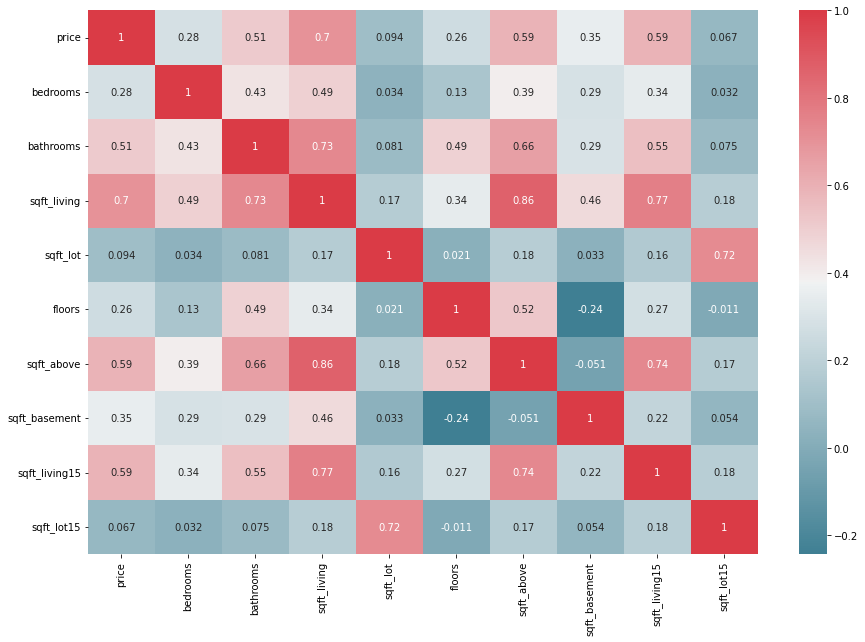

In [12]:
def correlation_heatmap(kc_houses):
    _, ax = plt.subplots(figsize = (15,10))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(kc_houses.corr(), annot = True, cmap = colormap)

selected_data = data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
'floors', 'sqft_above', 'sqft_basement', 'sqft_living15',
'sqft_lot15']]
correlation_heatmap(selected_data)

Check the relationship between price and the size of the living room.

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

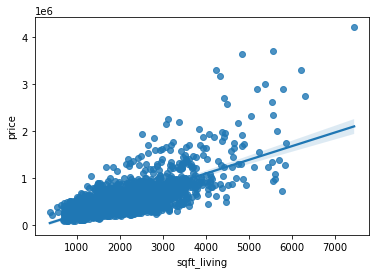

In [13]:
sns.regplot(x='sqft_living', y='price', data=data)

**Q5.** Check the relationship between price and the size of the basement.
Check the relationship between grade and the price.

<AxesSubplot:xlabel='grade', ylabel='price'>

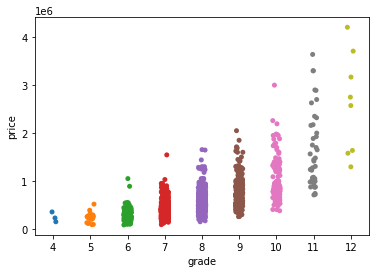

In [14]:
sns.stripplot(x= 'grade', y='price', data=data, size=5)

**Q6.** Check the relationship between number of rooms and the price. Leave a comment about what
you found.

The graph indicates that the relation of price with bedrooms - price goes up with number of
bedrooms up to 6 and then comes down as no of bedrooms increase.

**Q7.** Check the relatinoship between number of bathrooms and the price. Leave a comment about
what you found

In [15]:
data=data[data[ 'bedrooms'] < 12]

# 1.0.2 Building a model with top 5 parameters

In [16]:
c=['bedrooms','bathrooms','sqft_living','sqft_above','grade']
kc_houses = data[c]

In [17]:
kc_houses=pd.get_dummies(kc_houses,columns=[ 'grade'], drop_first=True)

In [18]:
y=data['price']

Perform `train`, `test split`. Put the **last three digits** of your index number as the random_state

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(kc_houses, y, train_size=0.8,
random_state=911)

In [20]:
x_train.head()

,bedrooms,bathrooms,sqft_living,sqft_above,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12
15418,2,1.00,740,740,0,1,0,0,0,0,0,0
3527,3,1.00,1510,1510,0,1,0,0,0,0,0,0
9613,6,2.75,3280,1910,0,0,1,0,0,0,0,0
16682,4,1.50,1550,1180,0,0,1,0,0,0,0,0
10856,4,2.50,2420,1680,0,0,0,1,0,0,0,0


In [21]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

Apply linear regression model

In [22]:
reg.fit(x_train, y_train)

LinearRegression()

Print the results of the regression model.

In [23]:
# print results of regression model
from sklearn import metrics
print('Coefficients :\n ', reg.coef_)
print('Mean Squared Error ', metrics.mean_squared_error(y_test,
    reg.predict(x_test)))

print('R square ', reg.score(x_test, y_test))

Coefficients :
  [ 1.44067003e+03 -3.13896905e+03  2.09889202e+02 -9.95868325e+01
 -2.59495080e+04 -1.99286782e+04  2.06395305e+04  1.04394607e+05
  2.68150243e+05  4.53106946e+05  9.36458319e+05  1.37911474e+06]
Mean Squared Error  73188564097.99875
R square  0.6384923121965763


# 1.0.3 Building a model with all parameters

Visualizing the relationship between floors, view and condition with the price.

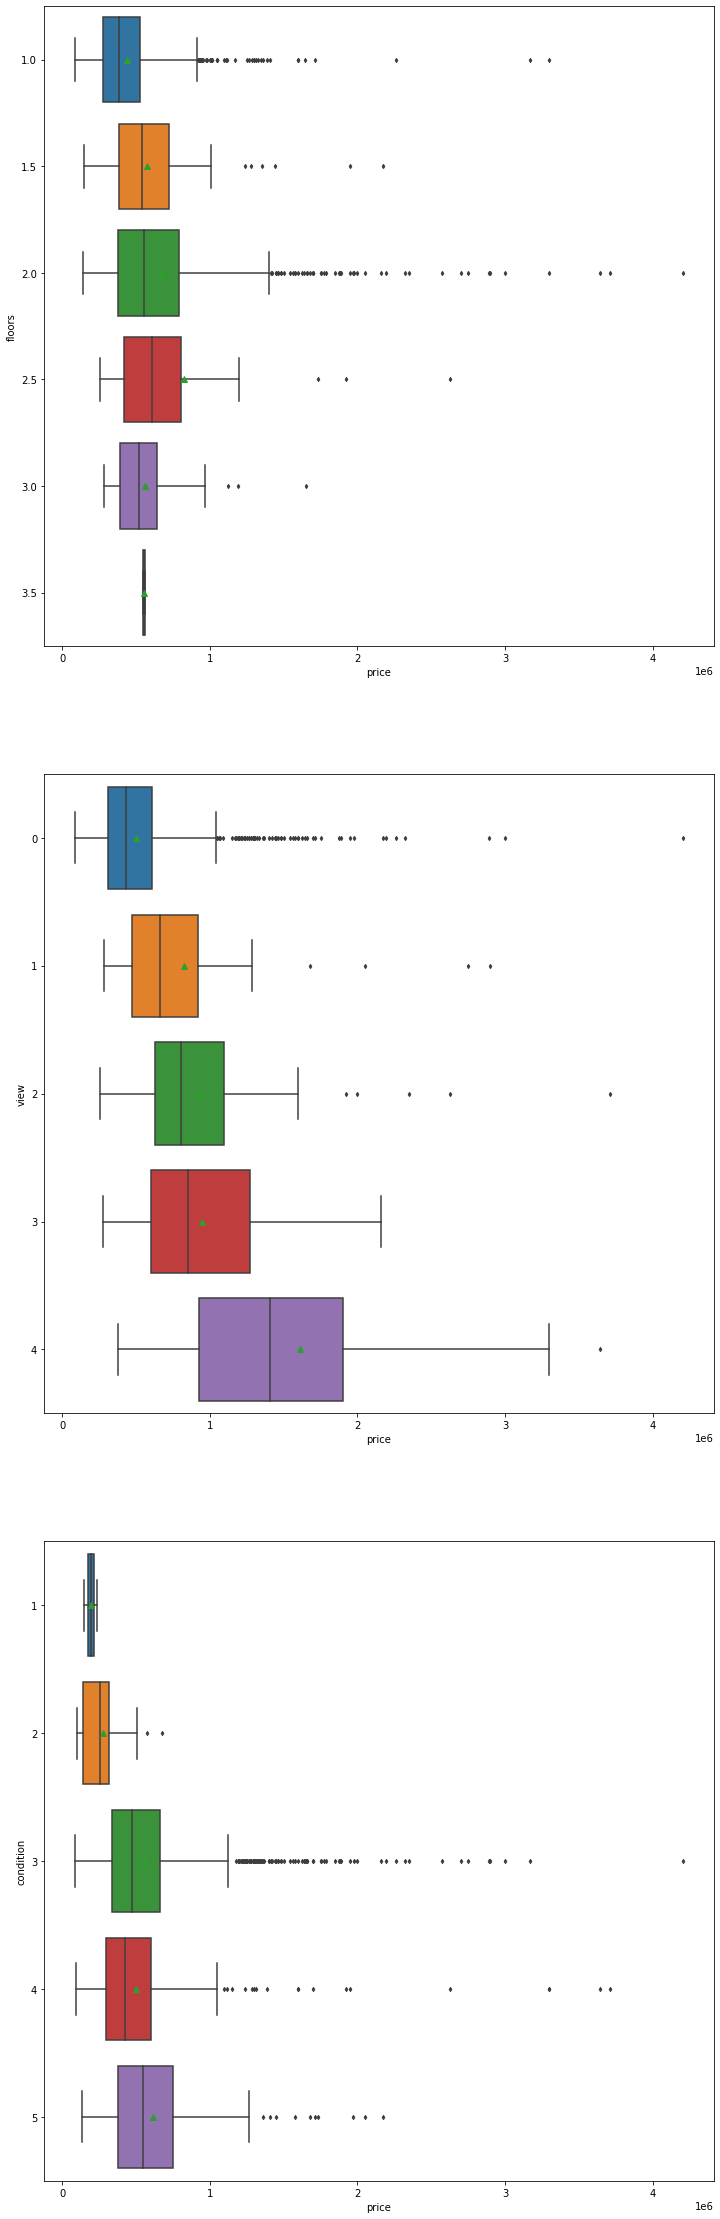

In [24]:
fig, axarr=plt.subplots(3, figsize=(12,40))
sns.boxplot(y= 'floors', x= 'price', data=data,width=0.8,
orient= 'h', showmeans=True, fliersize=3, ax=axarr[0])
sns.boxplot(y= 'view', x= 'price', data=data,width=0.8,
orient= 'h', showmeans=True, fliersize=3, ax=axarr[1])
sns.boxplot(y= 'condition', x= 'price', data=data,width=0.8,
orient= 'h', showmeans=True, fliersize=3, ax=axarr[2])
plt.show()

Visualize the house prices on map

In [25]:
# install folium module
!pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.3/102.3 kB 15.2 MB/s eta 0:00:00


In [26]:
!pip install --upgrade pip

In [27]:
import folium
from folium.plugins import HeatMap

# find row of the house which has the highest price
maxpr = data.loc[data['price'].idxmax()]

#define function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale = True,
    zoom_start=default_zoom_start)

    return base_map

df_copy=data.copy()
# select a zipcode for the heatmap
#set(df['zipcode'])
#df_copy = df[df['zipcode']==98001].copy()
df_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['lat'], maxpr['long']],
popup = 'Highest Price: $'+str(format(maxpr['price'],'.0f')),
icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index(),
radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap


Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_e627c0022c187d987d239be1b4e9942c {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 <script src="https://cdn.jsdelivr.net/gh/python-visualization/folium@main/folium/templates/leaflet_heat.min.js"></script>
</head>
<body>
 
 
 <div class="folium-map" id="map_e627c0022c187d987d239be1b4e9942c" ></div>
 
</body>
<script>
 
 
 var map_e627c0022c187d987d239be1b4e9942c = L.map(
 "map_e627c0022c187d987d239be1b4e9942c",
 {
 center: [47.5112, -122.257],
 crs: L.CRS.EPSG3857,
 zoom: 9.4,
 zoomControl: true,
 preferCanvas: false,
 }
 );
 L.control.scale().addTo(map_e627c0022c187d987d239be1b4e9942c);

 

 
 
 var tile_layer_5de782b6ec9eb23f40da82c06a10c56e = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_e627c0022c187d987d239be1b4e9942c);
 
 
 var tile_layer_7d9a5afedc03f5865b64942b7dc9228f = L.tileLayer(
 "https://cartodb-basemaps-{s}.global.ssl.fastly.net/light_all/{z}/{x}/{y}.png",
 {"attribution": "\u0026copy; \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eOpenStreetMap\u003c/a\u003e contributors \u0026copy; \u003ca target=\"_blank\" href=\"http://cartodb.com/attributions\"\u003eCartoDB\u003c/a\u003e, CartoDB \u003ca target=\"_blank\" href =\"http://cartodb.com/attributions\"\u003eattributions\u003c/a\u003e", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_e627c0022c187d987d239be1b4e9942c);
 
 
 var feature_group_37eb5bd7b56564a8c6dd4852e80903eb = L.featureGroup(
 {}
 ).addTo(map_e627c0022c187d987d239be1b4e9942c);
 
 
 var marker_a04d0f5b1c40ede292f871e773ecf877 = L.marker(
 [47.5692, -122.189],
 {}
 ).addTo(feature_group_37eb5bd7b56564a8c6dd4852e80903eb);
 
 
 var icon_847543b8e33c705f88e9953d02e7f9b6 = L.AwesomeMarkers.icon(
 {"extraClasses": "fa-rotate-0", "icon": "info-sign", "iconColor": "white", "markerColor": "green", "prefix": "glyphicon"}
 );
 mark

In [28]:
kc_houses=pd.get_dummies(data,columns=['waterfront','view','condition','grade','zipcode'],
drop_first=True)

In [29]:
y=data['price']
kc_houses=kc_houses.drop([ 'date','id','price'],axis=1)

Perform train, test split. Put the **last three digits** of your index number as the random_state

In [30]:
x_train,x_test,y_train,y_test=train_test_split(kc_houses,y,train_size=0.8,
random_state=911)